# Decision Trees

Decision Trees are member of classification algorithms. We will implement different decision trees in this example.

Sample data can be found on :  
https://www.kaggle.com/c/titanic/data  
https://www.kaggle.com/c/digit-recognizer/data  

Blog post about this notebook can be found on :  
https://medium.com/@canburaktumer

## 1. Identify the Problem  
We will use the Titanic dataset to predict if a passenger survives in the Titanic accident. So our problem is depending on the data given about passenger, deciding if the passenger had survived in the disaster.

In [5]:
# importing required libraries for data discovery and machine learning
import pandas as pd
import matplotlib.pyplot as mp
from sklearn import tree

# magic function of jupyter notebook to show plots in notebook
%matplotlib inline

In [10]:
# reading the csv file with pandas reader
df = pd.read_csv("data/titanic/train.csv")


## 2 Get to Know Data  
We've read our data into DataFrame now let's discover it.

In [12]:
# pandas method for dataframe summary
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [16]:
# describe prints statistical information for numeric columns
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
# head prints first five data lines
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


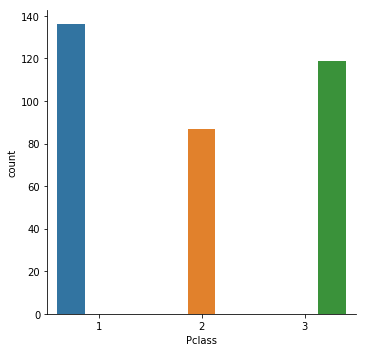

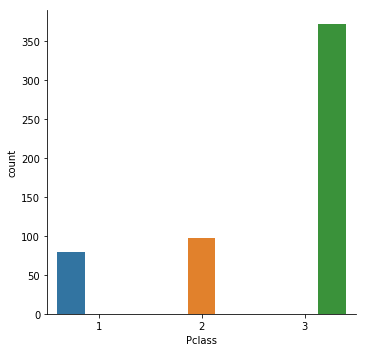

In [66]:
import seaborn as sns
survived = df[df['Survived']==1]
deceased = df[df['Survived']==0]
sns.catplot(x="Pclass",  hue="Pclass", data = survived, kind="count")
sns.catplot(x="Pclass",  hue="Pclass", data = deceased, kind="count")

Text(0.5,1,u'Survived')

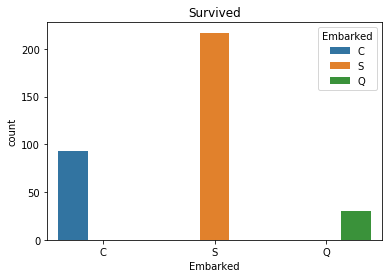

In [79]:
sns.countplot(x="Embarked",  hue="Embarked", data = survived, order=['C','S','Q']).set_title('Survived')

Text(0.5,1,u'Deceased')

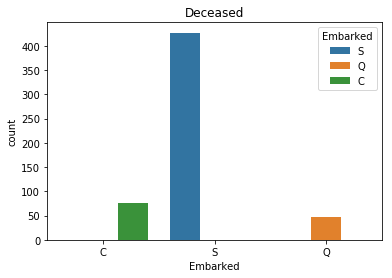

In [80]:
sns.countplot(x="Embarked",  hue="Embarked", data = deceased, order=['C','S','Q']).set_title('Deceased')

Text(0.5,1,u'All')

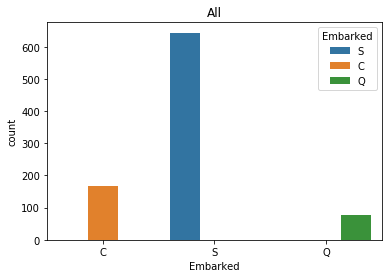

In [81]:
sns.countplot(x="Embarked",  hue="Embarked", data = df, order=['C','S','Q']).set_title('All')

Text(0.5,1,u'Survived')

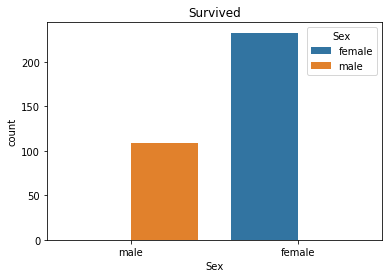

In [86]:
sns.countplot(x="Sex",  hue="Sex", data = survived, order=['male','female']).set_title('Survived')

Text(0.5,1,u'Deceased')

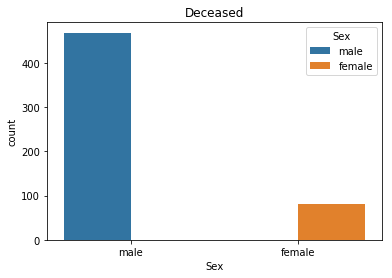

In [87]:
sns.countplot(x="Sex",  hue="Sex", data = deceased, order=['male','female']).set_title('Deceased')

Text(0.5,1,u'All')

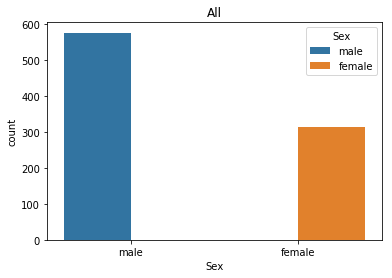

In [88]:
sns.countplot(x="Sex",  hue="Sex", data = df, order=['male','female']).set_title('All')

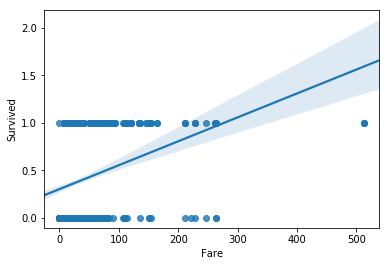

In [92]:
sns.regplot(y="Survived", x="Fare", data=df)

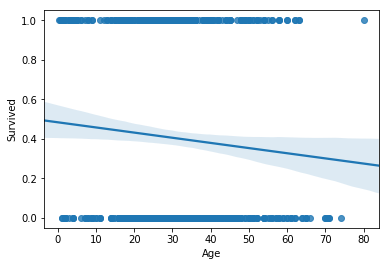

In [93]:
sns.regplot(y="Survived", x="Age", data=df)

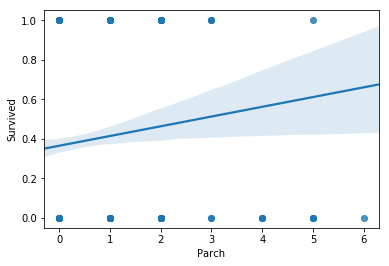

In [95]:
sns.regplot(y="Survived", x="Parch", data=df)

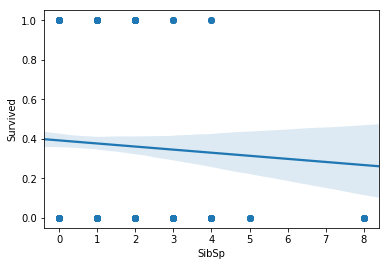

In [98]:
sns.regplot(y="Survived", x="SibSp", data=df)

## 3 Prepare Data  
Now since we've some insights from the data it is time to clean up the data from unrelated features.

In [137]:
cleaned = df.drop(['PassengerId', 'Parch', 'SibSp', 'Name', 'Ticket', 'Cabin'], axis = 1) # drop unrelated columns
cleanedAge = cleaned['Age'].fillna(df['Age'].mean()) # fill nulls in Age column with mean age
cleaned = cleaned.drop(['Age'], axis=1) # drop column with missing values
cleaned['Age'] = cleanedAge # add cleaned column to dataframe
cleaned = cleaned.dropna() # drop rows with empty embarked

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(cleaned['Embarked'])
embarked = le.transform(cleaned['Embarked'])
le.fit(cleaned['Sex'])
sex = le.transform(cleaned['Sex'])

cleaned = cleaned.drop(['Embarked', 'Sex'], axis = 1)
cleaned['Embarked'] = embarked
cleaned['Sex'] = sex

cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 6 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Fare        889 non-null float64
Age         889 non-null float64
Embarked    889 non-null int64
Sex         889 non-null int64
dtypes: float64(2), int64(4)
memory usage: 48.6 KB


In [138]:
cleaned.head()

,Survived,Pclass,Fare,Age,Embarked,Sex
0,0,3,7.2500,22,2,1
1,1,1,71.2833,38,0,0
2,1,3,7.9250,26,2,0
3,1,1,53.1000,35,2,0
4,0,3,8.0500,35,2,1


## 4 Split Data  
After the data cleansing, we need to split data into training and test set.

In [139]:
y = cleaned['Survived']
X = cleaned.drop('Survived', axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

 ## 5 Train Models

In [140]:
from sklearn import tree

giniClassifier = tree.DecisionTreeClassifier(criterion = 'gini', max_depth=5)
entropyClassifier = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=5)

giniClassifier.fit(X_train, y_train)
entropyClassifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## 6 Feed Test Data to Models

In [143]:
yPredGini = giniClassifier.predict(X_test)
yPredEntropy = entropyClassifier.predict(X_test)

## 7 Evaluate Results

In [147]:
from sklearn.metrics import f1_score

giniScore = f1_score(y_test, yPredGini)
entropyScore = f1_score(y_test, yPredEntropy)

print "Gini Score : "+ str(giniScore) + "\nEntropy Score : "+ str(entropyScore)

Gini Score : 0.7346938775510204
Entropy Score : 0.7282051282051282


In [155]:
tree.export_graphviz(giniClassifier, out_file="gini.dot", feature_names=X_train.columns, filled=True, rounded=True)
tree.export_graphviz(entropyClassifier, out_file="entropy.dot", feature_names=X_train.columns, filled=True, rounded=True)

## 8 Production

In [191]:
validation = pd.read_csv('data/titanic/test.csv')
validation = validation.drop(['PassengerId', 'Parch', 'SibSp', 'Name', 'Ticket', 'Cabin'], axis=1)

validationAge = validation['Age'].fillna(df['Age'].mean()) # fill nulls in Age column with mean age
validation = validation.drop(['Age'], axis=1) # drop column with missing values
validation['Age'] = validationAge # add cleaned column to dataframe
#validation = validation.dropna() # drop rows with empty embarked
validation = validation.fillna(0)

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(validation['Embarked'])
embarked = le.transform(validation['Embarked'])
le.fit(validation['Sex'])
sex = le.transform(validation['Sex'])

validation = validation.drop(['Embarked', 'Sex'], axis = 1)
validation['Embarked'] = embarked
validation['Sex'] = sex

yValidGini = giniClassifier.predict(validation)

pd.options.display.float_format = '{:,.0f}'.format
output['PassengerId'] = pd.read_csv('data/titanic/test.csv')['PassengerId']
output['Survived'] = pd.Series(yValidGini)
output.to_csv('dt_out.csv', index=False)
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
